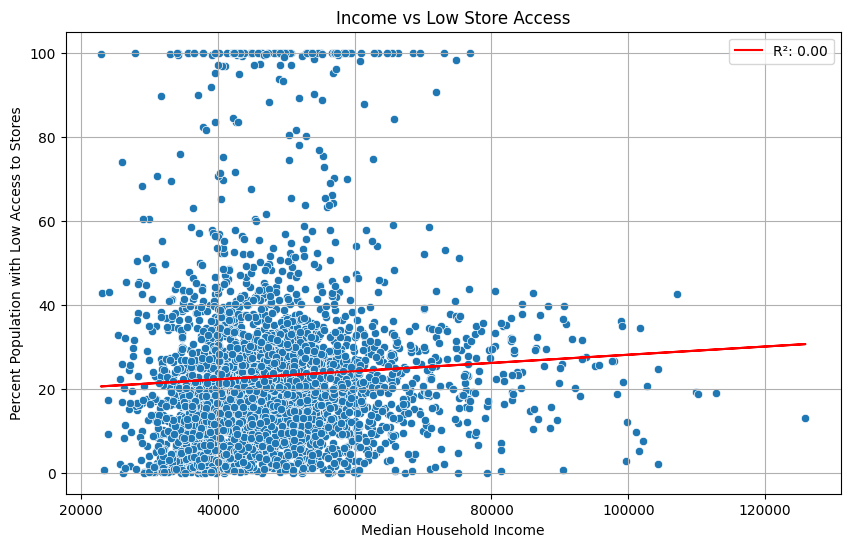

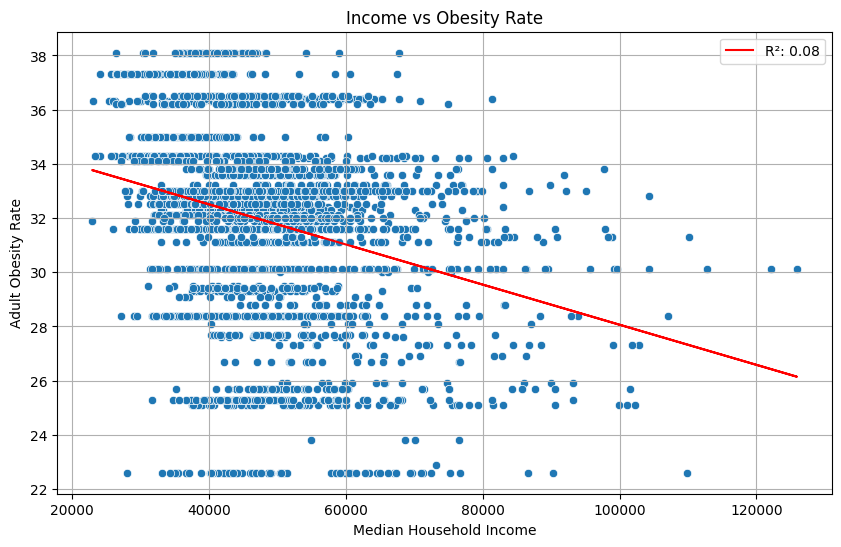

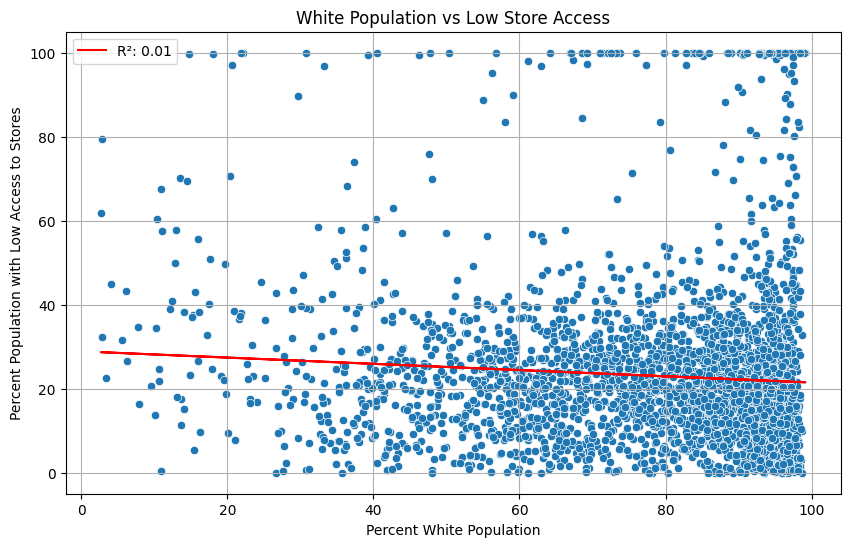

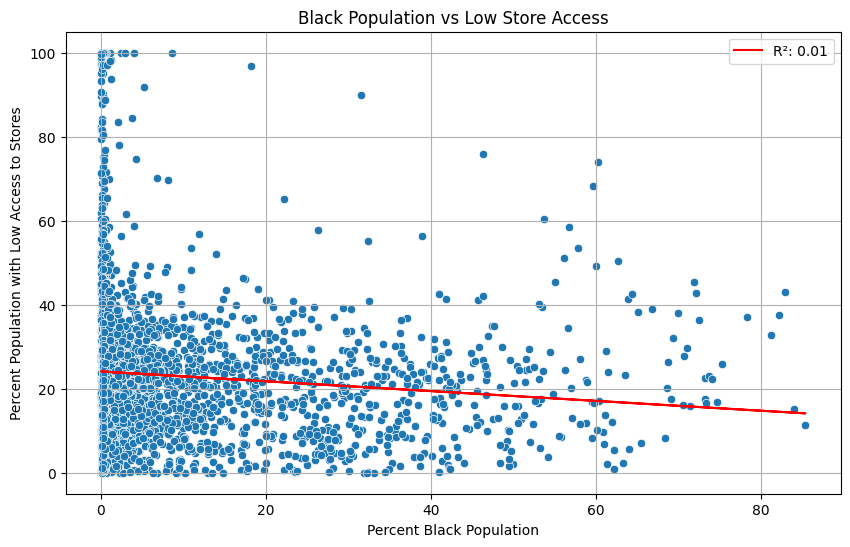

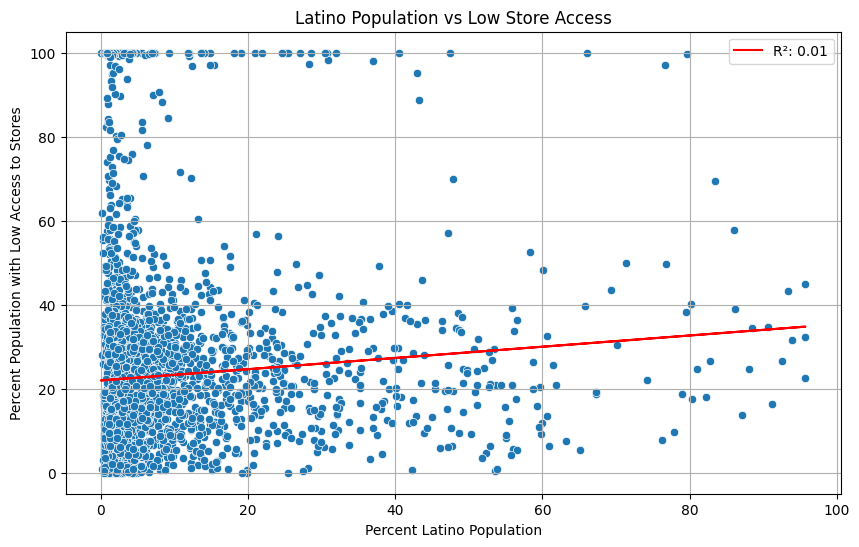

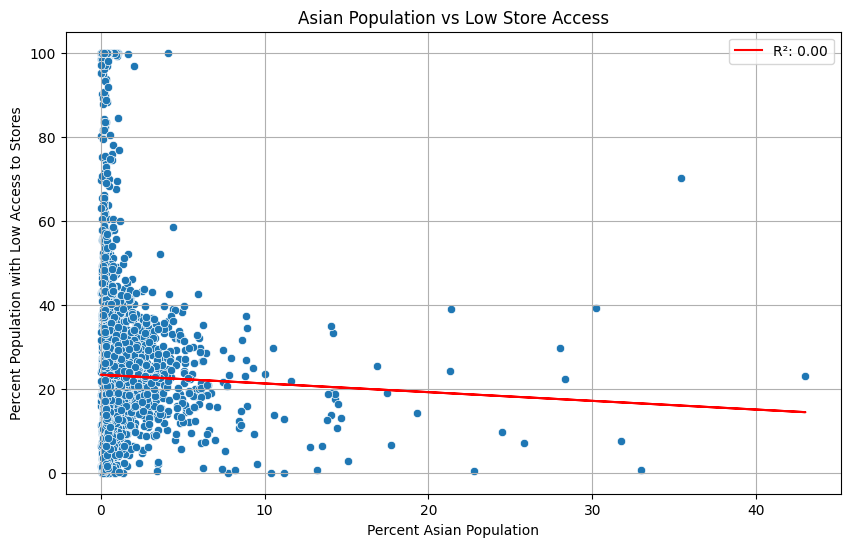

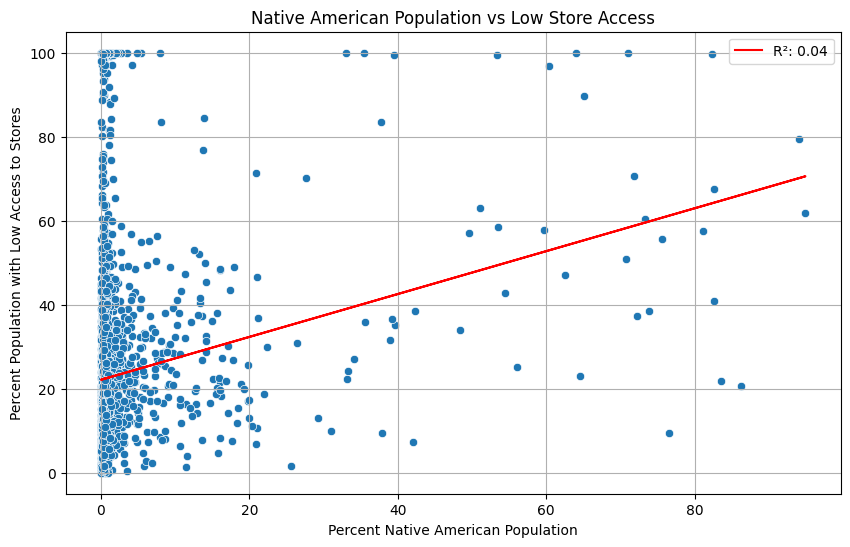

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Load the dataset
# Replace 'file_path' with the actual path to your Excel file
file_path = 'FoodEnvironmentAtlas.xls'

# Load the specific sheets into dataframes
try:
    socioeconomic_data = pd.read_excel(file_path, sheet_name='SOCIOECONOMIC')
    access_data = pd.read_excel(file_path, sheet_name='ACCESS')
    health_data = pd.read_excel(file_path, sheet_name='HEALTH')
except Exception as e:
    print(f"Error loading Excel file: {e}")
    exit()

# Extract the relevant columns with error handling
try:
    median_income_col = socioeconomic_data['MEDHHINC15']
    low_access_col = access_data['PCT_LACCESS_POP15']
    obesity_rate_col = health_data['PCT_OBESE_ADULTS17']
    
    # Racial demographics columns
    white_col = socioeconomic_data['PCT_NHWHITE10']
    black_col = socioeconomic_data['PCT_NHBLACK10']
    latino_col = socioeconomic_data['PCT_HISP10']
    asian_col = socioeconomic_data['PCT_NHASIAN10']
    native_american_col = socioeconomic_data['PCT_NHNA10']
except KeyError as e:
    print(f"Column not found in dataset: {e}")
    exit()

# Function to preprocess data (handle NaNs)
def preprocess_data(x, y):
    data = pd.DataFrame({'x': x, 'y': y})
    data = data.dropna()  # Drop rows with NaN values
    return data['x'], data['y']

# Function to plot regression model
def plot_regression(x, y, xlabel, ylabel, title):
    # Preprocess data
    x, y = preprocess_data(x, y)
    if x.empty or y.empty:
        print(f"No data to plot for: {title}")
        return

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y)
    
    # Fit regression model
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)
    
    # Plot regression line
    plt.plot(x, y_pred, color='red', label=f'R²: {r2_score(y, y_pred):.2f}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Visualizations

# Median household income vs. percent population with low access to stores
plot_regression(
    median_income_col, 
    low_access_col,
    xlabel='Median Household Income',
    ylabel='Percent Population with Low Access to Stores',
    title='Income vs Low Store Access'
)

# Median household income vs. adult obesity rate
plot_regression(
    median_income_col, 
    obesity_rate_col,
    xlabel='Median Household Income',
    ylabel='Adult Obesity Rate',
    title='Income vs Obesity Rate'
)

# Percent white vs low access to stores
plot_regression(
    white_col, 
    low_access_col,
    xlabel='Percent White Population',
    ylabel='Percent Population with Low Access to Stores',
    title='White Population vs Low Store Access'
)

# Percent black vs low access to stores
plot_regression(
    black_col, 
    low_access_col,
    xlabel='Percent Black Population',
    ylabel='Percent Population with Low Access to Stores',
    title='Black Population vs Low Store Access'
)

# Percent Latino vs low access to stores
plot_regression(
    latino_col, 
    low_access_col,
    xlabel='Percent Latino Population',
    ylabel='Percent Population with Low Access to Stores',
    title='Latino Population vs Low Store Access'
)

# Percent Asian vs low access to stores
plot_regression(
    asian_col, 
    low_access_col,
    xlabel='Percent Asian Population',
    ylabel='Percent Population with Low Access to Stores',
    title='Asian Population vs Low Store Access'
)

# Percent Native American vs low access to stores
plot_regression(
    native_american_col, 
    low_access_col,
    xlabel='Percent Native American Population',
    ylabel='Percent Population with Low Access to Stores',
    title='Native American Population vs Low Store Access'
)
